# Purpose
This folder is made to test [`Rasterio`](https://rasterio.readthedocs.io/) and see if it should be used instead of Pillow. Results here will help us decide the future implementation of this project.

# Installation

1) Install Anaconda/miniconda (if not already installed) 
    - Here's miniconda link: https://docs.conda.io/en/latest/miniconda.html
    - Make sure to **check the box** to "Add Miniconda to PATH" during installation.
    - Restart your terminal after installation.
2) create an environment in conda from the environment file provided:
```bash
    conda env create -f environment.yml
    conda activate rasterenv
```
3) Register conda env for jupyter notebooks (do it while in environment):
```bash
    conda install ipykernel
    python -m ipykernel install --user --name=rasterenv --display-name "Python (rasterenv)"
```


# test code:

In [147]:
#libraries:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401; needed for 3D
from rasterio.transform import from_origin


In [146]:

# below is path to data to test on
# test_file = "../hasan_work/verifyScript/temp/currData_dem.tif"
test_file = "../hasan_work/verifyScript/temp/currData_dem.tif"

with rasterio.open(test_file) as dataset:
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    print("CRS:", dataset.crs)
    print("Bounds:", dataset.bounds)
    print("Datatype:", dataset.dtypes)
    band1 = dataset.read(1)#.astype('float32')  # Read the first band into an array
    notData = dataset.nodata
    band = np.ma.masked_equal(band1, dataset.nodata)
    validData = band1 != notData
    print("Band shape:", band.shape)
    print("Data type:", band.dtype)
    print("Sample values:\n", band[500:550, 500:550])
    print("Min:", np.min(band))
    print("Max:", np.max(band))
    print("Mean:", np.mean(band))

    plt.imshow(band, cmap='gray')
    plt.colorbar(label='Elevation')
    plt.title('Elevation Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    print("Band type:", band1.dtype)
    print("Total area: ", validData.sum() * 2)


Width: 12927
Height: 55801
CRS: EPSG:3413
Bounds: BoundingBox(left=65830.0, bottom=-1193782.0, right=91684.0, top=-1082180.0)
Datatype: ('float32',)


KeyboardInterrupt: 

In [148]:

def generate_menger_sponge(level):
    def is_removed(x, y, z):
        while x > 0 or y > 0 or z > 0:
            if (x % 3 == 1 and y % 3 == 1) or (x % 3 == 1 and z % 3 == 1) or (y % 3 == 1 and z % 3 == 1):
                return True
            x //= 3
            y //= 3
            z //= 3
        return False

    size = 3 ** level
    sponge = np.ones((size, size, size), dtype=np.uint8)
    for x in range(size):
        for y in range(size):
            for z in range(size):
                if is_removed(x, y, z):
                    sponge[x, y, z] = 0
    return sponge


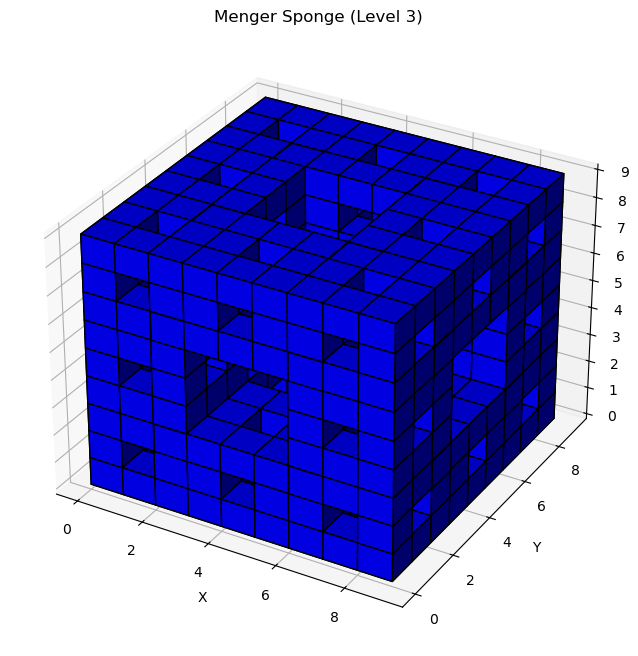

In [149]:


sponge = generate_menger_sponge(2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert to boolean so matplotlib knows which voxels to draw
filled = sponge.astype(bool)
slice_2d = filled[0]

# Plot voxels (optional: set facecolor or edgecolor)
ax.voxels(filled, facecolors='blue', edgecolor='k')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Menger Sponge (Level 3)")
plt.show()


In [150]:

slice_2d = sponge[:,0].astype(np.uint8)  # pick any Z-layer
# slice_2d = filled
slice_2d[slice_2d == 254] = 1
slice_2d[slice_2d == 255] = 0
transform = from_origin(0, 0, 1, 1)  # top-left at (0,0), 1x1 cell size


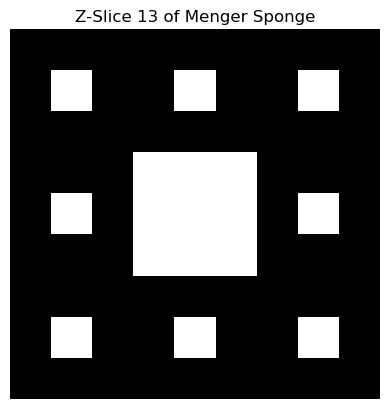

In [151]:
# z_index = sponge.shape[2] // 2 # Middle Z slice (XY plane)
# slice_2d = sponge[:, :, z_index].astype("uint8")  # Shape: (height, width)
inverted_slice = ~slice_2d
plt.imshow(inverted_slice, cmap="gray")
plt.title(f"Z-Slice {13} of Menger Sponge")
plt.axis("off")
plt.show()

# with rasterio.open(
#     "../data/Sierpinski carpet.tif",
#     'w',
#     driver='GTiff',
#     height=inverted_slice.shape[0],
#     width=inverted_slice.shape[1],
#     count=1,
#     dtype=inverted_slice.dtype,
#     transform=transform
# ) as dst:
#     dst.write(inverted_slice, 1)

In [152]:
def sponge_scaler(scaleMe, factor):
    def ceil(number):
        # can't handle negative numbers
        # did this bcs ion wanna import
        integerNumber = int(number)
        if(number == integerNumber):
            return number
        else:
            return integerNumber + 1

    size = scaleMe.shape[0]
    # print("dims = ", scaleMe.shape)
    # new_sponge = np.ones((size*factor, size*factor), dtype=bool)
    new_sponge = np.kron(scaleMe, np.ones((factor, factor), dtype=bool))

    # reach = factor // 2#int(ceil(factor/2))
    # print(reach)
    # targetCoords = []
    # for x in range(size):
    #     for y in range(size):
    #         # print("searching at ", x, y)
    #         if scaleMe[x,y] == False:
    #             targetCoords.append([x,y])
    #             # print("Found spot at:", x,y)

    # for coord in targetCoords:
    #     translatedCoords = [coord[0]*factor, coord[1]*factor]
    #     transX = translatedCoords[0]
    #     transY = translatedCoords[1]
    #     print("Coords:", coord)
    #     print("Translated Coords:", translatedCoords)
    #     for i in range(-reach, reach + 1, 1):
    #         for j in range(-reach, reach + 1, 1):
    #             print("modifying:", [transX + i, transY + j])
    #             new_sponge[transX + i, transY + j] = False   
    #             # print("Now they're:", new_sponge[transX + i, transY + j])
    
    return new_sponge

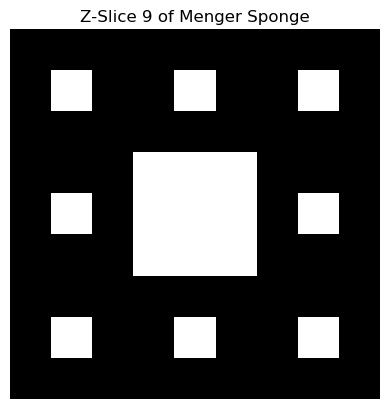

In [153]:
plt.imshow(inverted_slice, cmap="gray")
plt.title(f"Z-Slice {inverted_slice.shape[0]} of Menger Sponge")
plt.axis("off")
plt.show()

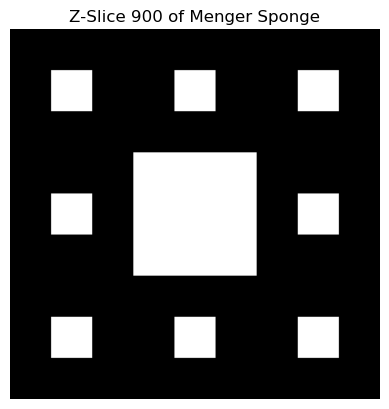

(900, 900)


In [154]:
scaledSponge = sponge_scaler(slice_2d, 100)

plt.imshow(scaledSponge, cmap="gray_r")
plt.title(f"Z-Slice {scaledSponge.shape[0]} of Menger Sponge")
plt.axis("off")
plt.show()
print(scaledSponge.shape)

In [155]:
slice_2d[0,0]

np.uint8(1)

In [156]:
test = scaledSponge.astype(np.uint8)
test

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(900, 900), dtype=uint8)

In [158]:
with rasterio.open(
    "../data/Sierpinski carpet.tif",
    'w',
    driver='GTiff',
    height=scaledSponge.shape[0],
    width=scaledSponge.shape[1],
    count=1,
    dtype=test.dtype,
    transform=transform
) as dst:
    dst.write(scaledSponge, 1)

c:\Users\Hasan\miniconda3\envs\pgc-stac-environment\Lib\site-packages\rasterio\__init__.py:366: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
